# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

Which variables would we need to **dummify**?

In [11]:
from palmerpenguins import load_penguins
import pandas as pd

df = load_penguins()
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


We would *need* to dummify:

        - species
        - island
        - sex

In [13]:
# Create dummy variables for categorical columns
df_dummified = pd.get_dummies(df, columns=['species', 'island', 'sex'], dtype = float)

# Display the first few rows of the transformed dataset
df_dummified.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year,species_Adelie,species_Chinstrap,species_Gentoo,island_Biscoe,island_Dream,island_Torgersen,sex_female,sex_male
0,39.1,18.7,181.0,3750.0,2007,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,39.5,17.4,186.0,3800.0,2007,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,40.3,18.0,195.0,3250.0,2007,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,NaN,NaN,NaN,NaN,2007,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,36.7,19.3,193.0,3450.0,2007,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


Let's use `bill_length_mm` to predict `bill_depth_mm`. Prepare your data and fit the following models on the entire dataset:

* Simple linear regression (e.g. straight-line) model
* Quadratic (degree 2 polynomial) model
* Cubic (degree 3 polynomial) model
* Degree 10 polynomial model

Make predictions for each model and plot your fitted models on the scatterplot.

In [14]:
def add_polynomial_features(df, column, max_degree):
    for degree in range(2, max_degree + 1):
        df[f'{column}_degree_{degree}'] = df[column] ** degree

# Usage
add_polynomial_features(df, 'bill_length_mm', 10)

# Display the first few rows to check the added polynomial columns
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year,bill_length_mm_degree_2,bill_length_mm_degree_3,bill_length_mm_degree_4,bill_length_mm_degree_5,bill_length_mm_degree_6,bill_length_mm_degree_7,bill_length_mm_degree_8,bill_length_mm_degree_9,bill_length_mm_degree_10
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007,1528.81,59776.471,2.337260e+06,9.138687e+07,3.573226e+09,1.397132e+11,5.462784e+12,2.135949e+14,8.351559e+15
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007,1560.25,61629.875,2.434380e+06,9.615801e+07,3.798241e+09,1.500305e+11,5.926206e+12,2.340851e+14,9.246363e+15
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007,1624.09,65450.827,2.637668e+06,1.062980e+08,4.283811e+09,1.726376e+11,6.957294e+12,2.803790e+14,1.129927e+16
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007,1346.89,49430.863,1.814113e+06,6.657794e+07,2.443410e+09,8.967315e+10,3.291005e+12,1.207799e+14,4.432621e+15


ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

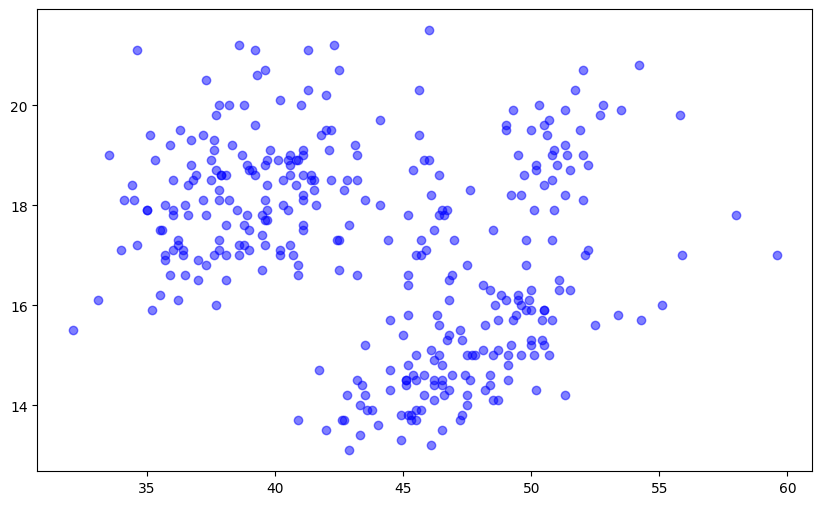

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
df.dropna()
# Prepare input variables and target
X = df[['bill_length_mm', 'bill_length_mm_degree_2', 'bill_length_mm_degree_3', 'bill_length_mm_degree_10']]
y = df['bill_depth_mm']

# Generate x_vals for plotting (from min to max of bill_length_mm)
x_vals = np.linspace(df['bill_length_mm'].min(), df['bill_length_mm'].max(), 100).reshape(-1, 1)

# Prepare a scatter plot of the original data
plt.figure(figsize=(10, 6))
plt.scatter(df['bill_length_mm'], y, color='blue', alpha=0.5, label="Data")

# Fit and plot models for degrees 1, 2, 3, and 10
degrees = [1, 2, 3, 10]

for degree in degrees:
    # Select the relevant features up to the current degree
    selected_features = [f'bill_length_mm_degree_{d}' if d > 1 else 'bill_length_mm' for d in range(1, degree + 1)]
    X_poly = df[selected_features]
    
    # Fit the linear regression model
    model = LinearRegression()
    model.fit(X_poly, y)
    
    # Predict using the fitted model for plotting
    x_vals_poly = np.hstack([x_vals ** d for d in range(1, degree + 1)])
    y_pred = model.predict(x_vals_poly)
    
    # Plot the polynomial fit
    plt.plot(x_vals, y_pred, label=f'Degree {degree} Polynomial')
    
    # Calculate and print RMSE for each model
    y_train_pred = model.predict(X_poly)
    rmse = mean_squared_error(y, y_train_pred, squared=False)
    print(f'Degree {degree} Polynomial - RMSE: {rmse:.4f}')

# Customize plot
plt.xlabel("Bill Length (mm)")
plt.ylabel("Bill Depth (mm)")
plt.legend()
plt.title("Polynomial Regression Models for Bill Depth vs. Bill Length")
plt.show()

* Are any of the models above underfitting the data? If so, which ones and how can you tell?
* Are any of thhe models above overfitting the data? If so, which ones and how can you tell?
* Which of the above models do you think fits the data best and why?